<a href="https://colab.research.google.com/github/AnkitRajSri/Pneumonia-Detection/blob/master/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraries

In [0]:
import os
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [0]:
tf.__version__

'2.1.0'

### Data Preprocessing

##### Preprocessing the training set

In [0]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
               'train', target_size=(64, 64),
                batch_size=32,
                class_mode='binary')

Found 5216 images belonging to 2 classes.


In [0]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_set = validation_datagen.flow_from_directory(
                 'val', target_size=(64, 64),
                 batch_size=32,
                 class_mode='binary')

Found 16 images belonging to 2 classes.


In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
                 'test', target_size=(64, 64),
                 batch_size=32,
                 class_mode='binary')

Found 624 images belonging to 2 classes.


### Building the CNN

##### Initializing the CNN and adding the layers

In [0]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, 
                               kernel_size=3,
                               activation='relu',
                               input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, 
                               kernel_size=3,
                               activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Compiling the CNN

In [0]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##### Training the CNN on the training set and evaluating it on the validation set

In [0]:
cnn.fit(x=training_set, validation_data=test_set, epochs=25)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 163 steps, validate for 20 steps
Epoch 1/25
163/163 [==============================] - 119s 731ms/step - loss: 0.0716 - accuracy: 0.9730 - val_loss: 0.2369 - val_accuracy: 0.9311
Epoch 2/25
163/163 [==============================] - 124s 761ms/step - loss: 0.0677 - accuracy: 0.9755 - val_loss: 0.4190 - val_accuracy: 0.8974
Epoch 3/25
163/163 [==============================] - 119s 732ms/step - loss: 0.0667 - accuracy: 0.9747 - val_loss: 0.3130 - val_accuracy: 0.9054
Epoch 4/25
163/163 [==============================] - 120s 738ms/step - loss: 0.0571 - accuracy: 0.9793 - val_loss: 0.3345 - val_accuracy: 0.8958
Epoch 5/25
163/163 [==============================] - 118s 725ms/step - loss: 0.0593 - accuracy: 0.9760 - val_loss: 0.2856 - val_accuracy: 0.9151
Epoch 6/25
163/163 [==============================] - 108s 665ms/step - loss: 0.0584 - accuracy: 0.9799 - val_loss: 0.2743 - val_accuracy: 0.9263
Epoch 7/25
163/163 [===========

### Making a prediction

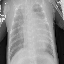

In [0]:
test_image = image.load_img('test/PNEUMONIA/person1_virus_7.jpeg', target_size=(64, 64))
test_image

In [0]:
test_image = image.img_to_array(test_image)
test_image

array([[[134., 134., 134.],
        [ 45.,  45.,  45.],
        [ 49.,  49.,  49.],
        ...,
        [222., 222., 222.],
        [205., 205., 205.],
        [213., 213., 213.]],

       [[ 53.,  53.,  53.],
        [ 40.,  40.,  40.],
        [ 60.,  60.,  60.],
        ...,
        [234., 234., 234.],
        [209., 209., 209.],
        [211., 211., 211.]],

       [[ 53.,  53.,  53.],
        [ 48.,  48.,  48.],
        [ 70.,  70.,  70.],
        ...,
        [185., 185., 185.],
        [212., 212., 212.],
        [216., 216., 216.]],

       ...,

       [[ 24.,  24.,  24.],
        [ 26.,  26.,  26.],
        [ 26.,  26.,  26.],
        ...,
        [ 17.,  17.,  17.],
        [ 19.,  19.,  19.],
        [ 18.,  18.,  18.]],

       [[ 26.,  26.,  26.],
        [ 26.,  26.,  26.],
        [ 26.,  26.,  26.],
        ...,
        [ 16.,  16.,  16.],
        [ 19.,  19.,  19.],
        [ 20.,  20.,  20.]],

       [[ 26.,  26.,  26.],
        [ 26.,  26.,  26.],
        [ 24.,  

In [0]:
test_image = np.expand_dims(test_image, axis=0)
test_image

array([[[[134., 134., 134.],
         [ 45.,  45.,  45.],
         [ 49.,  49.,  49.],
         ...,
         [222., 222., 222.],
         [205., 205., 205.],
         [213., 213., 213.]],

        [[ 53.,  53.,  53.],
         [ 40.,  40.,  40.],
         [ 60.,  60.,  60.],
         ...,
         [234., 234., 234.],
         [209., 209., 209.],
         [211., 211., 211.]],

        [[ 53.,  53.,  53.],
         [ 48.,  48.,  48.],
         [ 70.,  70.,  70.],
         ...,
         [185., 185., 185.],
         [212., 212., 212.],
         [216., 216., 216.]],

        ...,

        [[ 24.,  24.,  24.],
         [ 26.,  26.,  26.],
         [ 26.,  26.,  26.],
         ...,
         [ 17.,  17.,  17.],
         [ 19.,  19.,  19.],
         [ 18.,  18.,  18.]],

        [[ 26.,  26.,  26.],
         [ 26.,  26.,  26.],
         [ 26.,  26.,  26.],
         ...,
         [ 16.,  16.,  16.],
         [ 19.,  19.,  19.],
         [ 20.,  20.,  20.]],

        [[ 26.,  26.,  26.],
       

In [0]:
result = cnn.predict(test_image)
result

array([[1.]], dtype=float32)

In [0]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [0]:
if result[0][0] == 1:
    prediction = 'Yes'
else:
    prediction = 'No'
    
print(prediction)

Yes


In [0]:
predictions = cnn.predict(test_set)
predictions

array([[9.99127209e-01],
       [1.00000000e+00],
       [9.99928474e-01],
       [1.09114801e-03],
       [9.99967813e-01],
       [9.99459326e-01],
       [9.99999881e-01],
       [1.00000000e+00],
       [9.99017596e-01],
       [1.00000000e+00],
       [1.29443448e-04],
       [9.79463816e-01],
       [1.37045123e-02],
       [2.46368870e-02],
       [1.00000000e+00],
       [9.99968648e-01],
       [9.99991536e-01],
       [1.00000000e+00],
       [9.99998450e-01],
       [1.00000000e+00],
       [6.15069061e-04],
       [9.99976993e-01],
       [1.65362563e-03],
       [7.92328298e-01],
       [9.99999285e-01],
       [9.88547921e-01],
       [2.57708132e-01],
       [9.99999762e-01],
       [9.99968648e-01],
       [1.99339353e-02],
       [9.99307632e-01],
       [9.99978900e-01],
       [9.99983072e-01],
       [1.00000000e+00],
       [9.99995470e-01],
       [1.58128709e-01],
       [1.71573013e-01],
       [9.40156542e-03],
       [9.99028087e-01],
       [9.99979615e-01],
